In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import statsmodels.formula.api as smfa
import statsmodels.api as sma
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from patsy import dmatrices
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, chi2
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import calinski_harabasz_score

In [3]:
cats_df = pd.read_csv('data/cats.csv')
cats_df.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [4]:
mu = 2.6
ss.shapiro(cats_df['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [5]:
ss.wilcoxon(cats_df['Bwt'] - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [6]:
ss.ttest_1samp(cats_df['Bwt'], popmean=mu, alternative='two-sided')

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)

In [7]:
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data_df = pd.DataFrame(data)
data_df.head()

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2


In [8]:
ss.ttest_rel(data_df['before'], data_df['after'], alternative='two-sided')

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

In [9]:
ss.shapiro(data_df['before']), ss.shapiro(data_df['after'])

(ShapiroResult(statistic=0.9644594192504883, pvalue=0.8352694511413574),
 ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687))

In [10]:
female = cats_df.loc[cats_df['Sex'] == 'F', 'Bwt']
male = cats_df.loc[cats_df['Sex'] == 'M', 'Bwt']

In [11]:
ss.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [12]:
ss.ttest_ind(female, male, alternative='two-sided', equal_var=False)

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

(47, 97)

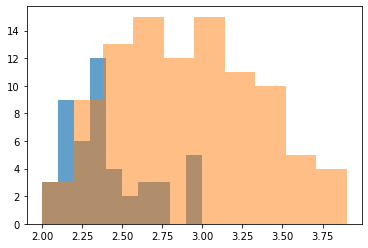

In [13]:
plt.hist(female, alpha=0.7)
plt.hist(male, alpha=0.5)
len(female), len(male)

In [14]:
iris_df = pd.read_csv('data/iris.csv')
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris_df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
target_list = iris_df['target'].unique()
setosa = iris_df.loc[iris_df['target'] == 'Iris-setosa', 'sepal width']
versicolor = iris_df.loc[iris_df['target'] == 'Iris-versicolor', 'sepal width']
virginica = iris_df.loc[iris_df['target'] == 'Iris-virginica', 'sepal width']

c:\Users\admin\anaconda3\lib\site-packages\seaborn\relational.py:608: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = ax.scatter(scout_x, scout_y, **kws)


<AxesSubplot:xlabel='target', ylabel='sepal width'>

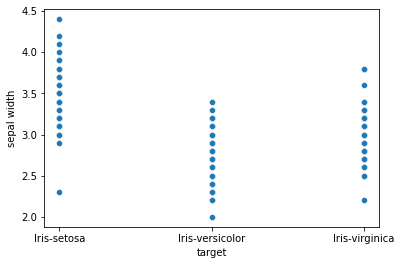

In [17]:
sns.scatterplot(data=iris_df, x='target', y='sepal width')

In [18]:
ss.shapiro(setosa), ss.shapiro(versicolor), ss.shapiro(virginica)

(ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427),
 ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507),
 ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896))

In [19]:
ss.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [20]:
ss.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

In [21]:
mc = MultiComparison(data=iris_df['sepal width'], groups=iris_df['target'])
mc.tukeyhsd(alpha=0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


In [22]:
ss.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [23]:
pg.welch_anova(data=iris_df, dv='sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881


In [24]:
mt_df = pd.read_csv('data/mtcars.csv')
mt_df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [25]:
formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = smfa.ols(formula=formula, data=mt_df).fit()

In [26]:
aov_table = anova_lm(model, typ=2).round(3)
aov_table

,sum_sq,df,F,PR(>F)
C(cyl),456.401,2.0,24.819,0.000
C(am),36.767,1.0,3.999,0.056
C(cyl):C(am),25.437,2.0,1.383,0.269
Residual,239.059,26.0,NaN,NaN


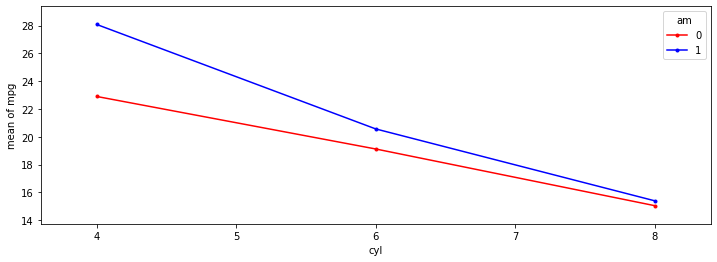

In [27]:
cyl = mt_df['cyl']
am = mt_df['am']
mpg = mt_df['mpg']
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
fig = interaction_plot(cyl, am, mpg, colors=['red', 'blue'], ax=ax)

In [28]:
tit_df = pd.read_csv('data/titanic.csv')
tit_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton


In [29]:
obs = tit_df[tit_df['survived'] == 1]['sex'].value_counts().reindex(['female', 'male'])
exp = tit_df['sex'].value_counts(normalize=True).reindex(['female', 'male']).mul(obs.sum())
obs, exp

(female    233
 male      109
 Name: sex, dtype: int64,
 female    120.525253
 male      221.474747
 Name: sex, dtype: float64)

In [30]:
ss.chisquare(f_obs=obs, f_exp=exp)

Power_divergenceResult(statistic=162.08166685161612, pvalue=3.970516389658729e-37)

In [31]:
table = pd.crosstab(tit_df['class'], tit_df['survived'])
table

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [32]:
chi2, p, ddof, exp_table = ss.chi2_contingency(table)
chi2, p, ddof, exp_table

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [33]:
house_df = pd.read_csv('data/kc_house_data.csv')
house_df[['price', 'sqft_living']].corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [34]:
formula = 'price ~ sqft_living'
model = smfa.ols(formula=formula, data=house_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Mon, 07 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:01:24   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

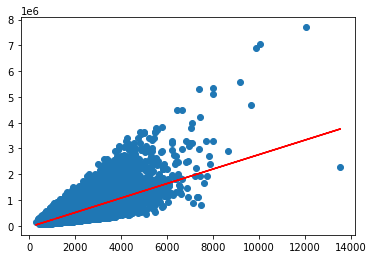

In [35]:
plt.scatter(x=house_df['sqft_living'], y=house_df['price'])
plt.plot(house_df['sqft_living'], model.predict(house_df['sqft_living']), color='red')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

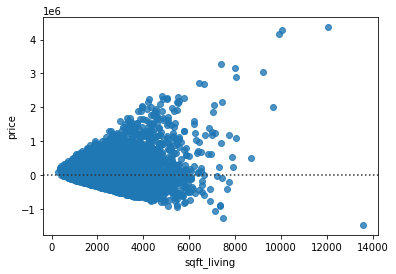

In [36]:
sns.residplot(data=house_df, x='sqft_living', y='price')

In [37]:
car_df = pd.read_csv('data/Cars93.csv')
car_df.columns = car_df.columns.str.replace('.', '')
car_df.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_13068\1094043285.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  car_df.columns = car_df.columns.str.replace('.', '')


,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


In [38]:
ind_var = ['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']

In [39]:
model = smfa.ols('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=car_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           4.88e-14
Time:                        21:01:25   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
car_df[ind_var].corr()

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [41]:
y, X = dmatrices('Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway', data=car_df, return_type='dataframe')
X, y

(    Intercept  EngineSize     RPM  Weight  Length  MPGcity  MPGhighway
 0         1.0         1.8  6300.0  2705.0   177.0     25.0        31.0
 1         1.0         3.2  5500.0  3560.0   195.0     18.0        25.0
 2         1.0         2.8  5500.0  3375.0   180.0     20.0        26.0
 3         1.0         2.8  5500.0  3405.0   193.0     19.0        26.0
 4         1.0         3.5  5700.0  3640.0   186.0     22.0        30.0
 ..        ...         ...     ...     ...     ...      ...         ...
 88        1.0         2.5  4500.0  3960.0   187.0     17.0        21.0
 89        1.0         2.0  5800.0  2985.0   180.0     21.0        30.0
 90        1.0         2.8  5800.0  2810.0   159.0     18.0        25.0
 91        1.0         2.3  5400.0  2985.0   190.0     21.0        28.0
 92        1.0         2.4  6200.0  3245.0   184.0     20.0        28.0
 
 [93 rows x 7 columns],
     Price
 0    15.9
 1    33.9
 2    29.1
 3    37.7
 4    30.0
 ..    ...
 88   19.7
 89   20.0
 90   23.3


In [42]:
vif_list = []
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

,vif,variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [43]:
model = smfa.ols('Price ~ EngineSize + RPM + Weight + Length + MPGhighway', data=car_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           1.28e-14
Time:                        21:01:25   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize     4.6591      1.386      3.361      0.001       1.904       7.415
RPM            0.0071      0.001      5.173      0.000       0.004       0.010
Weight         0.0053      0.003      1.567      0.121      -0.001       0.012
Length        -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPGhighway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
X_ind = X.iloc[:, 1:]

In [45]:
select = SelectKBest(score_func=f_classif, k=5).fit(X_ind, y.values.ravel())
X_ind_select = select.transform(X_ind)
select.get_feature_names_out()

array(['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity'], dtype=object)

In [46]:
lr = LinearRegression().fit(X_ind_select, y)
lr.score(X_ind_select, y)

0.5716570394369613

In [47]:
lr = LinearRegression().fit(X_ind, y)
lr.score(X_ind, y)

0.5717367147953842

In [48]:
us_df = pd.read_csv('data/USArrests.csv')
us_df = us_df.rename({'Unnamed: 0':'State'}, axis=1)
us_df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [49]:
single = sch.linkage(us_df.iloc[:, 1:], method='single', metric='euclidean')

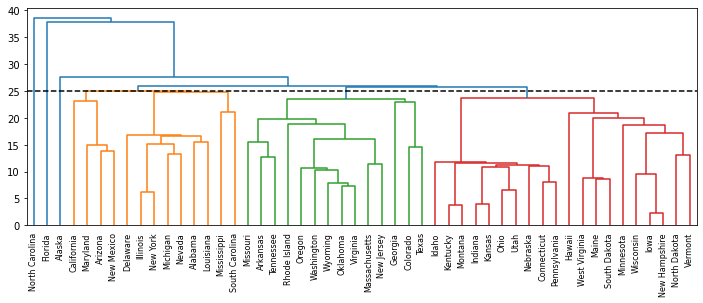

In [50]:
plt.figure(figsize=(12, 4))
sch.dendrogram(single, labels=us_df['State'].tolist(), color_threshold=25)
plt.axhline(25, color='black', linestyle='--')
plt.show()

In [51]:
ward = sch.linkage(us_df.iloc[:, 1:], method='ward', metric='euclidean')

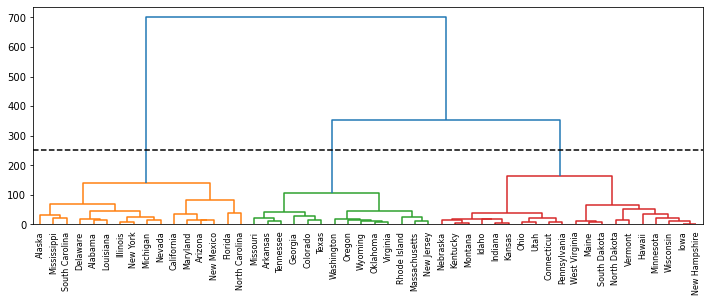

In [52]:
plt.figure(figsize=(12, 4))
sch.dendrogram(ward, labels=us_df['State'].tolist(), color_threshold=250)
plt.axhline(250, color='black', linestyle='--')
plt.show()

In [53]:
assignments = sch.fcluster(ward, t=250, criterion='distance')
us_df['cluster'] = assignments
us_df.head()

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [54]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
X = iris_df.iloc[:, :-1]
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [56]:
kmeans = KMeans(n_clusters=3).fit(X)
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [57]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    print(k, calinski_harabasz_score(X, kmeans.labels_))

2 513.3038433517568
3 560.3999242466402
4 529.3982941434156
5 493.79768982240194
6 474.85419152314864
7 450.7495385397598
8 439.1031541731567
9 413.3561290351985


c:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


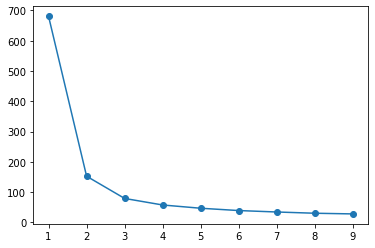

In [58]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')

In [59]:
pipe = make_pipeline(StandardScaler(), GaussianMixture(n_components=3)).fit(X)
pipe.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
gmm = GaussianMixture(n_components=3).fit(X_scaled)
gmm.predict(X_scaled)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [61]:
agg = AgglomerativeClustering(n_clusters=3).fit(X)
agg.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [62]:
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
test_df = pd.DataFrame(data, columns=['product'])
test_df['product'] = test_df['product'].replace({'a':1, 'b':0})
test_df.head()

,product
0,1
1,1
2,0
3,0
4,1


In [63]:
runstest_1samp(test_df.values, cutoff=0.5, correction=True)

(-1.1144881152070183, 0.26506984027306035)

In [64]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

In [65]:
te = TransactionEncoder().fit(dataset)
te_ary = te.transform(dataset)
te_ary, te.columns_

(array([[ True, False,  True,  True, False,  True],
        [ True, False,  True, False, False,  True],
        [ True, False,  True, False, False, False],
        [ True,  True, False, False, False, False],
        [False, False,  True,  True,  True,  True],
        [False, False,  True, False,  True,  True],
        [False, False,  True, False,  True, False],
        [ True,  True, False, False, False, False]]),
 ['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice'])

In [66]:
ar_df = pd.DataFrame(te_ary, columns=te.columns_)
ar_df.head()

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True


In [67]:
freq_items = apriori(ar_df, min_support=0.3, use_colnames=True)
freq_items['length'] = freq_items['itemsets'].apply(lambda df: len(df))
freq_items

,support,itemsets,length
0,0.625,(Apple),1
1,0.750,(Beer),1
2,0.375,(Milk),1
3,0.500,(Rice),1
4,0.375,"(Apple, Beer)",2
5,0.375,"(Beer, Milk)",2
6,0.500,"(Rice, Beer)",2


In [68]:
gro_df = pd.read_csv('data/groceries.csv', names=['food'])
df_split_ary = gro_df['food'].str.split(',', expand=True).values
df_split_ary

array([['citrus fruit', 'semi-finished bread', 'margarine', ..., None,
        None, None],
       ['tropical fruit', 'yogurt', 'coffee', ..., None, None, None],
       ['whole milk', None, None, ..., None, None, None],
       ...,
       ['chicken', 'citrus fruit', 'other vegetables', ..., None, None,
        None],
       ['semi-finished bread', 'bottled water', 'soda', ..., None, None,
        None],
       ['chicken', 'tropical fruit', 'other vegetables', ..., None, None,
        None]], dtype=object)

In [69]:
groceries = []
for i in range(len(df_split_ary)):
    temp = list(filter(None, df_split_ary[i]))
    groceries.append(temp)

In [70]:
te = TransactionEncoder().fit(groceries)
te_ary = te.transform(groceries)
te_ary, te.columns_

(array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False,  True, False],
        [False, False, False, ...,  True, False, False],
        ...,
        [False, False, False, ..., False,  True, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 ['Instant food products',
  'UHT-milk',
  'abrasive cleaner',
  'artif. sweetener',
  'baby cosmetics',
  'baby food',
  'bags',
  'baking powder',
  'bathroom cleaner',
  'beef',
  'berries',
  'beverages',
  'bottled beer',
  'bottled water',
  'brandy',
  'brown bread',
  'butter',
  'butter milk',
  'cake bar',
  'candles',
  'candy',
  'canned beer',
  'canned fish',
  'canned fruit',
  'canned vegetables',
  'cat food',
  'cereals',
  'chewing gum',
  'chicken',
  'chocolate',
  'chocolate marshmallow',
  'citrus fruit',
  'cleaner',
  'cling film/bags',
  'cocoa drinks',
  'coffee',
  'condensed milk',
  'cooking chocolate',
  

In [71]:
gro_te_df = pd.DataFrame(te_ary, columns=te.columns_)
gro_te_df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [72]:
gro_ap = apriori(gro_te_df, min_support=0.01, use_colnames=True)
gro_ap.head()

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)


In [73]:
(association_rules(gro_ap, metric='lift', min_threshold=3)
.sort_values(by='lift', ascending=False)
)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(whole milk, yogurt)",(curd),0.056024,0.053279,0.010066,0.179673,3.372304,0.007081,1.154078
7,(curd),"(whole milk, yogurt)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866
3,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354
4,(root vegetables),"(other vegetables, citrus fruit)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242
12,"(yogurt, other vegetables)",(whipped/sour cream),0.043416,0.071683,0.010168,0.234192,3.267062,0.007056,1.212206
13,(whipped/sour cream),"(yogurt, other vegetables)",0.071683,0.043416,0.010168,0.141844,3.267062,0.007056,1.114697
9,"(tropical fruit, other vegetables)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705
10,(root vegetables),"(tropical fruit, other vegetables)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776
0,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628


In [74]:
data_df = pd.read_csv('data/arima_data.csv', names=['day', 'price'])
data_df['day'] = pd.to_datetime(data_df['day'])
data_df = data_df.set_index('day')
data_df.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


<AxesSubplot:xlabel='day'>

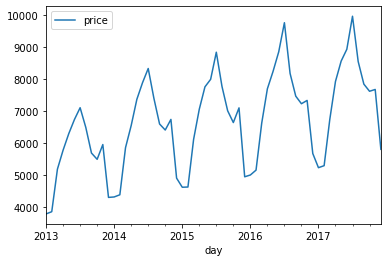

In [75]:
data_df.plot()

In [76]:
result = seasonal_decompose(data_df, model='multiplicative')
result

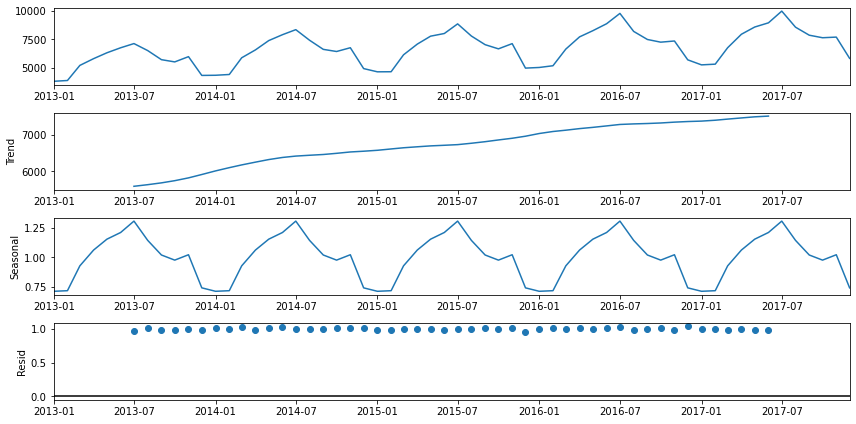

In [77]:
plt.rcParams['figure.figsize'] = [12, 6]
result.plot()
plt.show()

In [78]:
X_train = data_df.loc[:'2016-12-01', :]
X_test = data_df.loc['2017-01-01':, :]

In [79]:
adfuller(X_train, regression='ct')

(-1.9997199341327108,
 0.6015863303794554,
 10,
 37,
 {'1%': -4.226862411110892,
  '5%': -3.536645678834422,
  '10%': -3.200239967030581},
 571.2814574908573)

<AxesSubplot:xlabel='day'>

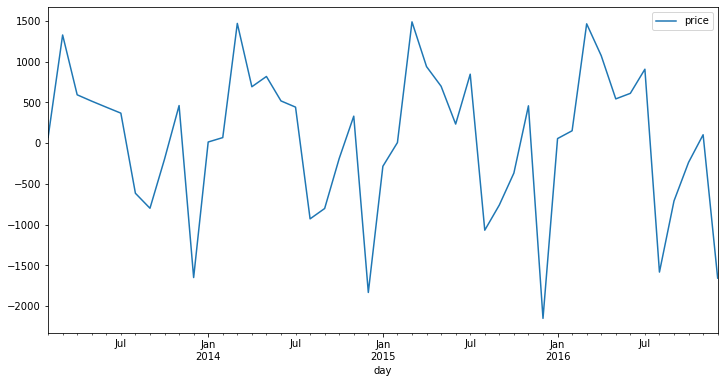

In [80]:
X_train_diff = (X_train
.diff(1)
.dropna()
)
X_train_diff.plot()

In [81]:
adfuller(X_train_diff, regression='c')

(-12.094547576926429,
 2.085160639961008e-22,
 10,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 522.2910197373668)

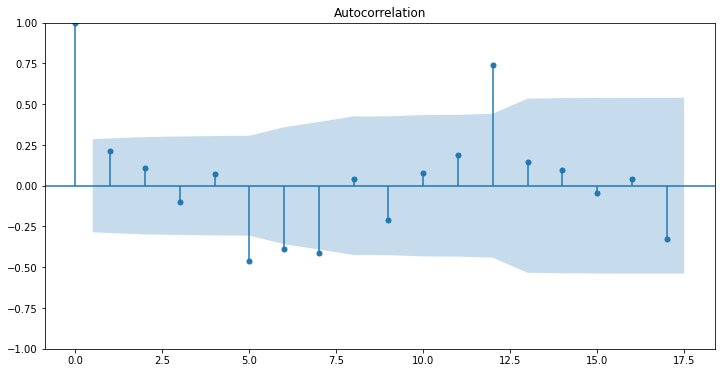

In [86]:
plot_acf(X_train_diff)
plt.show()

c:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


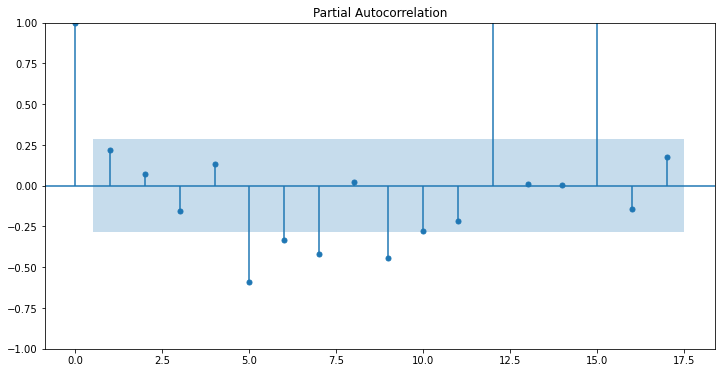

In [88]:
plot_pacf(X_train_diff)
plt.show()

In [95]:
model = ARIMA(X_train, order=[2, 0, 2], trend='ct').fit()
model.summary()

c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -380.820
Date:                Mon, 07 Nov 2022   AIC                            775.641
Time:                        21:08:32   BIC                            788.739
Sample:                    01-01-2013   HQIC                           780.591
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5282.7120    704.253      7.501      0.000    3902.401    6663.023
x1            45.1229     23.326      1.934      0.053      -0.596      90.842
ar.L1         -0.4787      0.167     -2.859      0.004      -0.807      -0.150
ar.L2          0.5170      0.170      3.041      0.002       0.184       0.850
ma.L1          1.9561      0.212      9.244      0.000       1.541       2.371
ma.L2          0.9851      0.214      4.607      0.000       0.566       1.404
sigma2       3.85e+05      0.132   2.91e+06      0.000    3.85e+05    3.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.75   Prob(JB):                         0.48
Heteroskedasticity (H):               1.37   Skew:                            -0.43
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.01e+23. Standard errors may be unstable.
"""

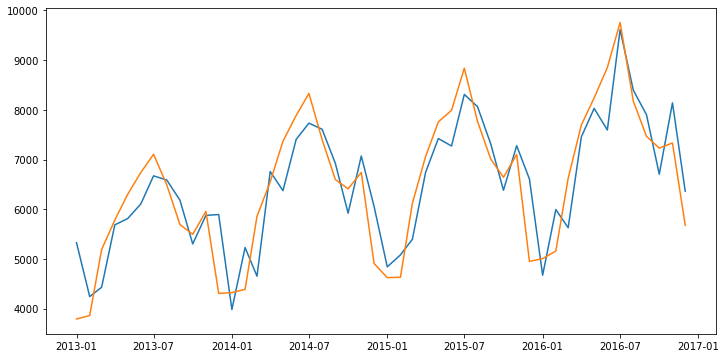

In [96]:
plt.plot(model.predict())
plt.plot(X_train)

In [97]:
test_pred = model.forecast(steps=len(X_test), alpha=0.05)

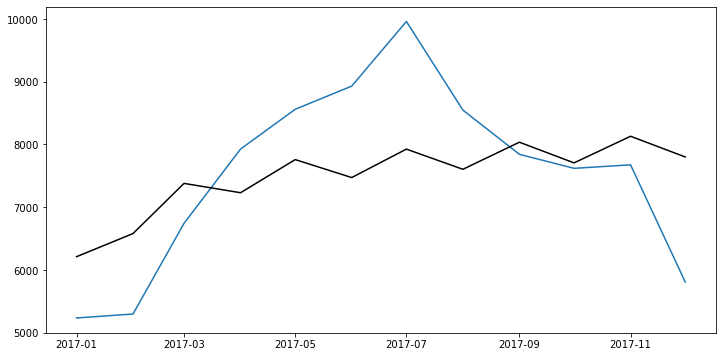

In [99]:
plt.plot(X_test)
plt.plot(test_pred, color='black')

In [104]:
auto_model = auto_arima(X_train, start_p=0, d=1, start_q=0,
max_p=3, max_q=3, start_P=0, start_Q=0, max_P=3, max_Q=3, m=12, seasonal=True, information_criterion='aic')

In [105]:
auto_model.predict(n_periods=len(X_test))

2017-01-01     5609.436978
2017-02-01     5761.436978
2017-03-01     7225.436978
2017-04-01     8298.436978
2017-05-01     8841.436978
2017-06-01     9452.436978
2017-07-01    10359.436978
2017-08-01     8777.436978
2017-09-01     8068.436978
2017-10-01     7832.436978
2017-11-01     7935.436978
2017-12-01     6279.436978
Freq: MS, dtype: float64

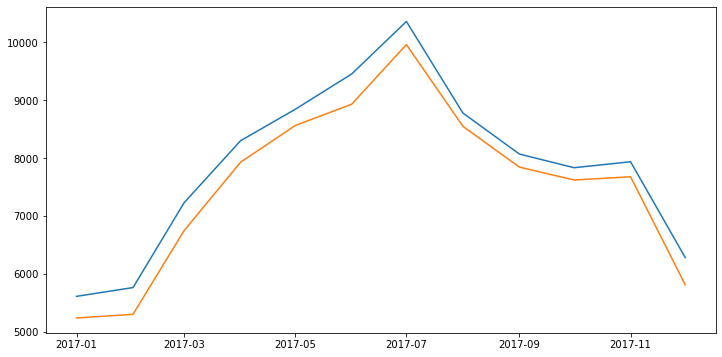

In [106]:
plt.plot(auto_model.predict(n_periods=len(X_test)))
plt.plot(X_test)

In [107]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Mon, 07 Nov 2022   AIC                            480.687
Time:                                     21:17:59   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""